In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
x, y, yerr = np.loadtxt('lorentzian.txt', unpack=True)

In [3]:
def lorentzian(x, A, gamma):
    """
    Lorentzian function for QENS analysis, constrained a bit.
    
    Args:
        x (array_like): energy transfer values. 
        A (float): scale factor.
        gamma (float): half width at half maximum.
        
    Returns:
        (array_like): model scattering function"""
    x0, b = -0.038281944596418975, 0.49566380819342426
    return (A / (np.pi * gamma * (1 + np.square((x - x0) / gamma)))) + b

In [4]:
def likelihood(A, gamma):
    return -0.5 * np.sum(np.square((y - lorentzian(x, A, gamma)) / yerr) + np.log(2 * np.pi * yerr))

In [5]:
A_range = np.linspace(0.932, 0.96, 100)
gamma_range = np.linspace(0.525, 0.55, 100)
X, Y = np.meshgrid(A_range, gamma_range)
Z = np.zeros_like(X)
for i, A in enumerate(A_range):
    for j, gamma in enumerate(gamma_range):
        Z[j, i] = np.exp(likelihood(A, gamma))

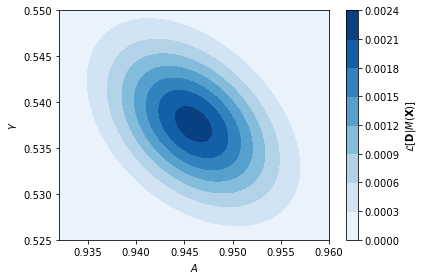

In [6]:
fig = plt.figure(figsize=(6, 4))
plt.contourf(X, Y, Z, cmap='Blues')
plt.colorbar(label='$\mathcal{L}[\mathbf{D}|M(\mathbf{X})]$')
plt.ylabel('$\gamma$')
plt.xlabel('$A$')
plt.tight_layout()
plt.savefig('likelihood_plot.png', transparent=True, facecolor='white')